In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import HTML, display
import tabulate

In [44]:
csv1 = pd.read_csv("../../data/number_conflicting_chunks.csv")

csv1 = csv1.rename(columns={"chunks": "chunks_corretos"})

print(f"CSV has {len(csv1)} projects.")

CSV has 2731 projects.


In [25]:
csv1.head()

,id,project,chunks_corretos
0,3518171,sebastianbenz/Jnario,10372
1,3661343,CCI-MIT/XCoLab,6889
2,2524488,apache/accumulo,5141
3,65885,android/platform_frameworks_base,4446
4,1006053,TeamDev-Ltd/OpenFaces,3723


In [26]:
csv2 = pd.read_csv("../../data/number_chunks__updated_repos.csv")

print(f"CSV has {len(csv1)} projects.")

CSV has 2731 projects.


In [27]:
csv2.head()

,project_id,project,chunks,project_new_ownername
0,65906,android/platform_packages_apps_settings,58177,aosp-mirror/platform_packages_apps_settings
1,2970227,AOKP/packages_apps_Settings,55452,NaN
2,65885,android/platform_frameworks_base,41378,aosp-mirror/platform_frameworks_base
3,3518171,sebastianbenz/Jnario,10384,NaN
4,4212733,RealVNC/android-frameworks-base-with-screensho...,10346,VNCAutomotive/android-frameworks-base-with-scr...


In [28]:
df_inner = pd.merge(csv1, csv2, on='project', how='inner')

In [198]:
len(df_inner)

2731

In [29]:
df_inner.head()

,id,project,chunks_corretos,project_id,chunks,project_new_ownername
0,3518171,sebastianbenz/Jnario,10372,3518171,10384,NaN
1,3661343,CCI-MIT/XCoLab,6889,3661343,7048,NaN
2,2524488,apache/accumulo,5141,2524488,6086,NaN
3,65885,android/platform_frameworks_base,4446,65885,41378,aosp-mirror/platform_frameworks_base
4,1006053,TeamDev-Ltd/OpenFaces,3723,1006053,4859,TeamDev-Archive/OpenFaces


In [30]:
df_inner[df_inner["id"] == 65885]

,id,project,chunks_corretos,project_id,chunks,project_new_ownername
3,65885,android/platform_frameworks_base,4446,65885,41378,aosp-mirror/platform_frameworks_base


In [31]:
csv1[csv1["id"] == 65885]

,id,project,chunks_corretos
3,65885,android/platform_frameworks_base,4446


In [32]:
csv2[csv2["project_id"] == 65885]

,project_id,project,chunks,project_new_ownername
2,65885,android/platform_frameworks_base,41378,aosp-mirror/platform_frameworks_base


In [35]:
df_inner[["chunks_corretos", "chunks"]]

,chunks_corretos,chunks
0,10372,10384
1,6889,7048
2,5141,6086
3,4446,41378
4,3723,4859
...,...,...
2726,1,1
2727,1,1
2728,1,4
2729,1,1


In [297]:
result = df_inner[["id", "project", "project_new_ownername", "chunks_corretos"]]

result = result.rename(columns={"chunks_corretos": "chunks"})

result

,id,project,project_new_ownername,chunks
0,3518171,sebastianbenz/Jnario,NaN,10372
1,3661343,CCI-MIT/XCoLab,NaN,6889
2,2524488,apache/accumulo,NaN,5141
3,65885,android/platform_frameworks_base,aosp-mirror/platform_frameworks_base,4446
4,1006053,TeamDev-Ltd/OpenFaces,TeamDev-Archive/OpenFaces,3723
...,...,...,...,...
2726,3467722,pingpongboss/Phone-Modem,NaN,1
2727,3468682,htdvisser/Skt,REPO_NOT_FOUND,1
2728,2130242,justjoheinz/STLDroid,NaN,1
2729,3355503,SpoutDev/BukkitBridge,NaN,1


In [298]:
result = result.assign(repo_not_found = lambda d: d["project_new_ownername"] == "REPO_NOT_FOUND")

In [300]:
result.project_new_ownername = result.project_new_ownername.map(lambda d: np.nan if d == "REPO_NOT_FOUND" else d)

In [294]:
result.project_new_ownername.str.contains('REPO_NOT_FOUND', regex=False).sum()

0

In [303]:
result.sample(n=10)

,id,project,project_new_ownername,chunks,repo_not_found
824,2516253,stackmob/stackmob-java-client-sdk,NaN,19,True
1602,4210923,openintents/filemanager,NaN,5,False
1966,2066721,toedter/JCalendar,toedter/jcalendar,3,False
1680,1611009,Mach5/supersonic,NaN,4,False
347,763770,jri/deepamehta,dmx-systems/dmx-platform,73,False
424,2308614,awltech/org.parallelj,NaN,57,False
1668,1217414,eclipse-color-theme/eclipse-color-theme,NaN,4,False
2627,3667007,kohsuke/file-leak-detector,NaN,1,False
1996,1553781,eclipse/virgo.test,NaN,2,False
1299,3626870,Prototik/HoloEverywhere,NaN,8,False


In [302]:
# result.assign(repo_not_found = lambda d: d["project_new_ownername"])

In [274]:
# result.assign(repo_not_found = lambda d: True if d["project_new_ownername"] == "REPO_NOT_FOUND" else False)

In [315]:
result.to_csv("output.csv", index=False)

## Selection of Projects

In [304]:
result.head()

,id,project,project_new_ownername,chunks,repo_not_found
0,3518171,sebastianbenz/Jnario,NaN,10372,False
1,3661343,CCI-MIT/XCoLab,NaN,6889,False
2,2524488,apache/accumulo,NaN,5141,False
3,65885,android/platform_frameworks_base,aosp-mirror/platform_frameworks_base,4446,False
4,1006053,TeamDev-Ltd/OpenFaces,TeamDev-Archive/OpenFaces,3723,False


### Selecting projects with #chunks >= 1000

#### Using the old incorrect #chunks data

In [58]:
df_inner[df_inner["chunks"] >= 1000]

,id,project,chunks_corretos,project_id,chunks,project_new_ownername
0,3518171,sebastianbenz/Jnario,10372,3518171,10384,NaN
1,3661343,CCI-MIT/XCoLab,6889,3661343,7048,NaN
2,2524488,apache/accumulo,5141,2524488,6086,NaN
3,65885,android/platform_frameworks_base,4446,65885,41378,aosp-mirror/platform_frameworks_base
4,1006053,TeamDev-Ltd/OpenFaces,3723,1006053,4859,TeamDev-Archive/OpenFaces
...,...,...,...,...,...,...
518,807037,miurahr/nevernote,42,807037,1592,NaN
804,65904,android/platform_packages_apps_packageinstaller,20,65904,2568,aosp-mirror/platform_packages_apps_packageinst...
850,2387149,CyanogenMod/android_packages_apps_PackageInsta...,18,2387149,2072,NaN
906,1553790,eclipse/jgit,16,1553790,1669,NaN


#### Using the correct #chunks data:

In [57]:
result[result["chunks"] >= 1000]

,id,project,project_new_ownername,chunks
0,3518171,sebastianbenz/Jnario,NaN,10372
1,3661343,CCI-MIT/XCoLab,NaN,6889
2,2524488,apache/accumulo,NaN,5141
3,65885,android/platform_frameworks_base,aosp-mirror/platform_frameworks_base,4446
4,1006053,TeamDev-Ltd/OpenFaces,TeamDev-Archive/OpenFaces,3723
5,4212733,RealVNC/android-frameworks-base-with-screensho...,VNCAutomotive/android-frameworks-base-with-scr...,2836
6,3405664,jgralab/jgralab,NaN,2590
7,2902099,AOKP/frameworks_base_disabled,NaN,2498
8,3518362,adetaylor/android-frameworks-base-with-remote-...,NaN,2240
9,3129899,IceColdSandwich/android_frameworks_base,NaN,2240


### Searching a good N for the filter `#chunks >= N`

In [146]:
data = []
min_chunks = []
num_projects = []

for i in range(1,100):
    n = 10 * i
    selection = result[result["chunks"] >= n]
    data.append([n, len(selection)])
    min_chunks.append(n)
    num_projects.append(len(selection))
    
# data

chunks_projects = pd.DataFrame({"min_chunks": min_chunks, "num_projects": num_projects})

chunks_projects

# min_chunks, num_projects

,min_chunks,num_projects
0,10,1182
1,20,822
2,30,656
3,40,541
4,50,463
...,...,...
94,950,29
95,960,29
96,970,29
97,980,29


In [139]:
chunks_projects[(chunks_projects["min_chunks"] >= 200) & 
                (chunks_projects["min_chunks"] <= 600)].to_clipboard(index=False)

<AxesSubplot:xlabel='min_chunks', ylabel='num_projects'>

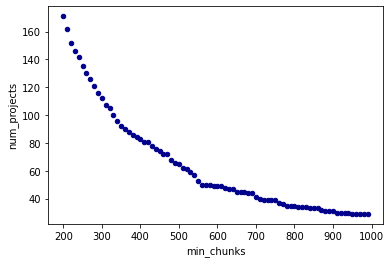

In [125]:
chunks_projects[chunks_projects["min_chunks"] >= 200].plot.scatter(x="min_chunks", y="num_projects", c="DarkBlue")

# ax1 = df.plot.scatter(x='length',
#                       y='width',
#                       c='DarkBlue')

In [142]:
chunks_projects[chunks_projects["min_chunks"] == 900]

,min_chunks,num_projects
89,900,31


In [107]:
# Minimum number of chunks per project
N = 400

selecao = result[result["chunks"] >= N]

print(f"{len(selecao)} projects with {N} of more chunks.")

selecao

83 projects with 400 of more chunks.


,id,project,project_new_ownername,chunks
0,3518171,sebastianbenz/Jnario,NaN,10372
1,3661343,CCI-MIT/XCoLab,NaN,6889
2,2524488,apache/accumulo,NaN,5141
3,65885,android/platform_frameworks_base,aosp-mirror/platform_frameworks_base,4446
4,1006053,TeamDev-Ltd/OpenFaces,TeamDev-Archive/OpenFaces,3723
...,...,...,...,...
78,3548254,thinkaurelius/titan,NaN,428
79,229738,jdbi/jdbi,NaN,427
80,2996011,imglib/imglib2,NaN,422
81,3943003,wala/WALA,NaN,406


<AxesSubplot:>

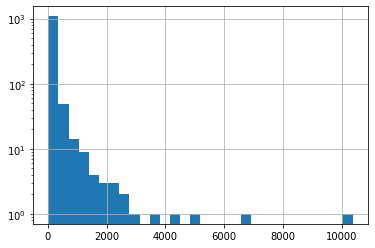

In [91]:
selecao["chunks"].hist(bins=30, log=True)


Com os dados de #chunks corretos temos esse histograma:

<AxesSubplot:>

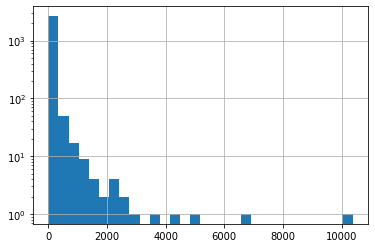

In [72]:
result["chunks"].hist(bins=30, log=True)

Com os dados de #chunks errados havia esse histograma de #chunks:

<AxesSubplot:>

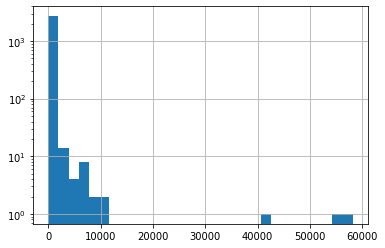

In [74]:
df_inner["chunks"].hist(bins=30, log=True)

In [147]:
api_data = pd.read_csv("../../data/projects_data_from_github_api.csv")

In [208]:
api_data

,resourcePath,stargazerCount,isFork,deleteBranchOnMerge,mergeCommitAllowed,primaryLanguage,rebaseMergeAllowed,squashMergeAllowed,issues,pullRequests,releases,watchers,forks,forkCount,commits,contributors,branches,tags
0,/0xCopy/RelaxFactory,18,False,False,True,Java,True,True,14,18,2,3,5,7,629,3,15,10
1,/3111H-Focus/Father-Focus,4,False,False,True,Java,True,True,2,61,0,1,4,4,223,3,1,0
2,/360/360-Engine-for-Android,51,False,False,True,Java,True,True,1,3,0,3,23,25,492,14,3,0
3,/3scale-labs/3scale_ws_api_for_java,27,False,False,True,Java,True,True,14,25,0,45,29,30,90,19,3,20
4,/4ntoine/Firmata,38,False,False,True,Java,True,True,9,2,0,7,18,18,28,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2592,/structr/structr,600,False,False,True,Java,True,True,472,76,0,57,130,135,13075,26,18,65
2593,/stupidsing/suite,2,False,False,True,Java,True,True,4,10,0,1,2,2,13192,2,11,0
2594,/subgraph/Orchid,216,False,False,True,Java,True,True,21,15,0,36,66,86,539,5,3,2
2595,/suggitpe/Katas,3,False,False,True,Java,True,True,0,0,0,1,0,0,23,1,2,0


In [226]:
api_data2 = api_data.assign(project_actual_ownername = lambda d: d.resourcePath.str[1:])

api_data2

# df.assign(temp_f=lambda x: x['temp_c'] * 9 / 5 + 32,
#           temp_k=lambda x: (x['temp_f'] +  459.67) * 5 / 9)

# df.assign(temp_f=df['temp_c'] * 9 / 5 + 32)

,resourcePath,stargazerCount,isFork,deleteBranchOnMerge,mergeCommitAllowed,primaryLanguage,rebaseMergeAllowed,squashMergeAllowed,issues,pullRequests,releases,watchers,forks,forkCount,commits,contributors,branches,tags,project_actual_ownername
0,/0xCopy/RelaxFactory,18,False,False,True,Java,True,True,14,18,2,3,5,7,629,3,15,10,0xCopy/RelaxFactory
1,/3111H-Focus/Father-Focus,4,False,False,True,Java,True,True,2,61,0,1,4,4,223,3,1,0,3111H-Focus/Father-Focus
2,/360/360-Engine-for-Android,51,False,False,True,Java,True,True,1,3,0,3,23,25,492,14,3,0,360/360-Engine-for-Android
3,/3scale-labs/3scale_ws_api_for_java,27,False,False,True,Java,True,True,14,25,0,45,29,30,90,19,3,20,3scale-labs/3scale_ws_api_for_java
4,/4ntoine/Firmata,38,False,False,True,Java,True,True,9,2,0,7,18,18,28,2,1,0,4ntoine/Firmata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2592,/structr/structr,600,False,False,True,Java,True,True,472,76,0,57,130,135,13075,26,18,65,structr/structr
2593,/stupidsing/suite,2,False,False,True,Java,True,True,4,10,0,1,2,2,13192,2,11,0,stupidsing/suite
2594,/subgraph/Orchid,216,False,False,True,Java,True,True,21,15,0,36,66,86,539,5,3,2,subgraph/Orchid
2595,/suggitpe/Katas,3,False,False,True,Java,True,True,0,0,0,1,0,0,23,1,2,0,suggitpe/Katas


In [159]:
result

,id,project,project_new_ownername,chunks
0,3518171,sebastianbenz/Jnario,NaN,10372
1,3661343,CCI-MIT/XCoLab,NaN,6889
2,2524488,apache/accumulo,NaN,5141
3,65885,android/platform_frameworks_base,aosp-mirror/platform_frameworks_base,4446
4,1006053,TeamDev-Ltd/OpenFaces,TeamDev-Archive/OpenFaces,3723
...,...,...,...,...
2726,3467722,pingpongboss/Phone-Modem,NaN,1
2727,3468682,htdvisser/Skt,REPO_NOT_FOUND,1
2728,2130242,justjoheinz/STLDroid,NaN,1
2729,3355503,SpoutDev/BukkitBridge,NaN,1


### Adding new column "project_actual_ownername"


In [306]:
result2 = result.assign(project_actual_ownername = result["project_new_ownername"].combine_first(result["project"]))

In [307]:
result2

,id,project,project_new_ownername,chunks,repo_not_found,project_actual_ownername
0,3518171,sebastianbenz/Jnario,NaN,10372,False,sebastianbenz/Jnario
1,3661343,CCI-MIT/XCoLab,NaN,6889,False,CCI-MIT/XCoLab
2,2524488,apache/accumulo,NaN,5141,False,apache/accumulo
3,65885,android/platform_frameworks_base,aosp-mirror/platform_frameworks_base,4446,False,aosp-mirror/platform_frameworks_base
4,1006053,TeamDev-Ltd/OpenFaces,TeamDev-Archive/OpenFaces,3723,False,TeamDev-Archive/OpenFaces
...,...,...,...,...,...,...
2726,3467722,pingpongboss/Phone-Modem,NaN,1,False,pingpongboss/Phone-Modem
2727,3468682,htdvisser/Skt,NaN,1,True,htdvisser/Skt
2728,2130242,justjoheinz/STLDroid,NaN,1,False,justjoheinz/STLDroid
2729,3355503,SpoutDev/BukkitBridge,NaN,1,False,SpoutDev/BukkitBridge


In [308]:
# result[result["project_new_ownername"].combine_first(result["project"])\
# .str.contains('aosp-mirror/platform_frameworks_base', regex=False)]

In [309]:
len(result2)

2731

In [310]:
len(api_data2)

2597

In [311]:
api_and_newnames = pd.merge(result2, api_data2, on='project_actual_ownername', how='left')

api_and_newnames

,id,project,project_new_ownername,chunks,repo_not_found,project_actual_ownername,resourcePath,stargazerCount,isFork,deleteBranchOnMerge,...,issues,pullRequests,releases,watchers,forks,forkCount,commits,contributors,branches,tags
0,3518171,sebastianbenz/Jnario,NaN,10372,False,sebastianbenz/Jnario,/sebastianbenz/Jnario,133.0,False,False,...,146.0,35.0,0.0,19.0,32.0,37.0,1303.0,9.0,19.0,20.0
1,3661343,CCI-MIT/XCoLab,NaN,6889,False,CCI-MIT/XCoLab,/CCI-MIT/XCoLab,15.0,False,False,...,9.0,288.0,0.0,8.0,10.0,10.0,10045.0,25.0,97.0,0.0
2,2524488,apache/accumulo,NaN,5141,False,apache/accumulo,/apache/accumulo,864.0,False,False,...,628.0,1394.0,0.0,88.0,333.0,351.0,10876.0,131.0,3.0,38.0
3,65885,android/platform_frameworks_base,aosp-mirror/platform_frameworks_base,4446,False,aosp-mirror/platform_frameworks_base,/aosp-mirror/platform_frameworks_base,9532.0,False,False,...,0.0,111.0,0.0,911.0,5360.0,5901.0,566598.0,763.0,250.0,1034.0
4,1006053,TeamDev-Ltd/OpenFaces,TeamDev-Archive/OpenFaces,3723,False,TeamDev-Archive/OpenFaces,/TeamDev-Archive/OpenFaces,28.0,False,False,...,173.0,3.0,0.0,19.0,14.0,15.0,3293.0,18.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,3467722,pingpongboss/Phone-Modem,NaN,1,False,pingpongboss/Phone-Modem,/pingpongboss/Phone-Modem,30.0,False,False,...,0.0,0.0,0.0,5.0,9.0,9.0,24.0,2.0,1.0,0.0
2727,3468682,htdvisser/Skt,NaN,1,True,htdvisser/Skt,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2728,2130242,justjoheinz/STLDroid,NaN,1,False,justjoheinz/STLDroid,/justjoheinz/STLDroid,10.0,False,False,...,1.0,0.0,0.0,1.0,4.0,4.0,24.0,1.0,1.0,5.0
2729,3355503,SpoutDev/BukkitBridge,NaN,1,False,SpoutDev/BukkitBridge,/SpoutDev/BukkitBridge,19.0,False,False,...,0.0,53.0,0.0,17.0,9.0,9.0,248.0,21.0,1.0,0.0


In [246]:
len(api_and_newnames)

2731

In [313]:
api_and_newnames.sample(n=20)

,id,project,project_new_ownername,chunks,repo_not_found,project_actual_ownername,resourcePath,stargazerCount,isFork,deleteBranchOnMerge,...,issues,pullRequests,releases,watchers,forks,forkCount,commits,contributors,branches,tags
298,1089149,spring-projects/spring-batch,NaN,91,False,spring-projects/spring-batch,/spring-projects/spring-batch,1800.0,False,False,...,3057.0,835.0,12.0,250.0,1744.0,1784.0,5633.0,177.0,12.0,110.0
1145,4608947,drewhannay/chess,NaN,10,False,drewhannay/chess,/drewhannay/chess,34.0,False,False,...,106.0,126.0,0.0,13.0,46.0,46.0,863.0,9.0,7.0,0.0
956,3717973,FDVSolutions/DynamicJasper,intive-FDV/DynamicJasper,14,False,intive-FDV/DynamicJasper,/intive-FDV/DynamicJasper,189.0,False,False,...,79.0,29.0,0.0,24.0,105.0,106.0,707.0,9.0,18.0,91.0
126,3430789,griddynamics/jagger,NaN,269,False,griddynamics/jagger,/griddynamics/jagger,64.0,False,False,...,47.0,815.0,0.0,28.0,38.0,39.0,2343.0,28.0,13.0,70.0
1640,1810897,spring-projects/spring-android-samples,NaN,4,False,spring-projects/spring-android-samples,/spring-projects/spring-android-samples,769.0,False,False,...,14.0,10.0,0.0,110.0,507.0,509.0,228.0,16.0,2.0,1.0
506,2127774,Spoutcraft/Spoutcraft,NaN,43,False,Spoutcraft/Spoutcraft,/Spoutcraft/Spoutcraft,165.0,False,False,...,0.0,186.0,0.0,30.0,68.0,76.0,3322.0,50.0,6.0,0.0
714,694779,ZhouWeikuan/cocos2d,NaN,25,False,ZhouWeikuan/cocos2d,/ZhouWeikuan/cocos2d,613.0,False,False,...,66.0,16.0,0.0,93.0,287.0,289.0,248.0,14.0,3.0,0.0
1139,161180,alphazero/jredis,NaN,10,False,alphazero/jredis,/alphazero/jredis,306.0,False,False,...,54.0,11.0,0.0,40.0,132.0,135.0,314.0,4.0,4.0,2.0
2596,1749101,restsql/restsql-test,NaN,1,False,restsql/restsql-test,/restsql/restsql-test,5.0,False,False,...,0.0,3.0,0.0,4.0,9.0,9.0,45.0,3.0,1.0,2.0
1088,2347800,robotframework/RemoteApplications,NaN,11,False,robotframework/RemoteApplications,/robotframework/RemoteApplications,11.0,False,False,...,15.0,3.0,0.0,9.0,2.0,3.0,141.0,7.0,3.0,2.0


### Investigando por que no merge apareceram projetos com vários NaN...

In [203]:
result[result["project"] == "kohsuke/hudson"]

,id,project,project_new_ownername,chunks
62,252276,kohsuke/hudson,kohsuke/jenkins,509


In [209]:
api_data[api_data["resourcePath"] == "/kohsuke/hudson"]

,resourcePath,stargazerCount,isFork,deleteBranchOnMerge,mergeCommitAllowed,primaryLanguage,rebaseMergeAllowed,squashMergeAllowed,issues,pullRequests,releases,watchers,forks,forkCount,commits,contributors,branches,tags


In [214]:
api_data2["project"].str.contains('kohsuke', regex=False)

0       False
1       False
2       False
3       False
4       False
        ...  
2592    False
2593    False
2594    False
2595    False
2596    False
Name: project, Length: 2597, dtype: bool

In [215]:
api_data2[api_data2["project"].str.contains('kohsuke', regex=False)]

,resourcePath,stargazerCount,isFork,deleteBranchOnMerge,mergeCommitAllowed,primaryLanguage,rebaseMergeAllowed,squashMergeAllowed,issues,pullRequests,releases,watchers,forks,forkCount,commits,contributors,branches,tags,project
1292,/kohsuke/args4j,714,False,False,True,Java,True,True,80,101,0,32,175,176,618,27,4,31,kohsuke/args4j
1293,/kohsuke/file-leak-detector,186,False,False,True,Java,True,True,19,33,0,10,82,85,150,13,3,12,kohsuke/file-leak-detector
1295,/kohsuke/jenkins,977,True,False,True,Java,True,True,0,35,0,116,7,7,27278,278,7,68,kohsuke/jenkins


In [216]:
result[result["project"].str.contains('kohsuke', regex=False)]

,id,project,project_new_ownername,chunks
62,252276,kohsuke/hudson,kohsuke/jenkins,509
910,1911993,kohsuke/args4j,NaN,16
1435,617210,kohsuke/github-api,hub4j/github-api,6
2627,3667007,kohsuke/file-leak-detector,NaN,1


In [201]:
api_and_newnames.sample(n=20)

,id,project,project_new_ownername,chunks,resourcePath,stargazerCount,isFork,deleteBranchOnMerge,mergeCommitAllowed,primaryLanguage,...,issues,pullRequests,releases,watchers,forks,forkCount,commits,contributors,branches,tags
1998,2488113,jayway/jax-rs-hateoas,NaN,2,/jayway/jax-rs-hateoas,32.0,False,False,True,Java,...,3.0,0.0,0.0,26.0,9.0,9.0,105.0,11.0,1.0,10.0
1916,649714,Zanshinmu/Wifi-Fixer,NaN,3,/Zanshinmu/Wifi-Fixer,116.0,False,False,True,Java,...,37.0,4.0,0.0,31.0,53.0,56.0,1264.0,1.0,1.0,15.0
62,252276,kohsuke/hudson,kohsuke/jenkins,509,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,2701659,ninetwozero/BF3-Battlelog,NaN,91,/ninetwozero/BF3-Battlelog,26.0,False,False,True,Java,...,55.0,97.0,0.0,3.0,7.0,7.0,526.0,6.0,10.0,0.0
1184,3149437,spring-projects/spring-security-kerberos,NaN,9,/spring-projects/spring-security-kerberos,137.0,False,False,True,Java,...,108.0,50.0,0.0,32.0,183.0,187.0,141.0,38.0,2.0,4.0
1450,1081732,darranl/jbosgi,NaN,6,/darranl/jbosgi,1.0,False,False,True,Java,...,0.0,1.0,0.0,2.0,7.0,20.0,1027.0,1.0,4.0,4.0
2223,1373984,Evenprime/NoCheat,REPO_NOT_FOUND,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2688,891905,fornwall/eclipsecoder,NaN,1,/fornwall/eclipsecoder,24.0,False,False,True,Java,...,5.0,8.0,2.0,4.0,19.0,19.0,25.0,5.0,1.0,4.0
917,2053216,Fob/Commons-SSH,NaN,16,/Fob/Commons-SSH,7.0,False,False,True,Java,...,1.0,29.0,22.0,4.0,7.0,7.0,131.0,8.0,8.0,30.0
1063,1059430,belaban/JGroups,NaN,12,/belaban/JGroups,851.0,False,False,True,Java,...,0.0,530.0,0.0,96.0,408.0,420.0,19244.0,76.0,126.0,271.0


In [196]:
len(api_and_newnames)

2731

In [191]:
len(api_data2)

2597

In [192]:
len(result)

2731

In [179]:
api_and_newnames["project_new_ownername"].notna().sum()

0

In [172]:
api_and_newnames[api_and_newnames["project_new_ownername"].notna()]

,resourcePath,stargazerCount,isFork,deleteBranchOnMerge,mergeCommitAllowed,primaryLanguage,rebaseMergeAllowed,squashMergeAllowed,issues,pullRequests,...,forks,forkCount,commits,contributors,branches,tags,project,id,project_new_ownername,chunks


In [187]:
api_and_newnames["project"].dropna()

0              0xCopy/RelaxFactory
1         3111H-Focus/Father-Focus
2       360/360-Engine-for-Android
3                  4ntoine/Firmata
4            7yl4r/AvatarWallpaper
                   ...            
2379           struberg/deltaspike
2380               structr/structr
2381              stupidsing/suite
2382               subgraph/Orchid
2383                suggitpe/Katas
Name: project, Length: 2384, dtype: object

In [180]:
api_and_newnames["project_new_ownername"].isna()

0       True
1       True
2       True
3       True
4       True
        ... 
2379    True
2380    True
2381    True
2382    True
2383    True
Name: project_new_ownername, Length: 2384, dtype: bool

In [165]:
api_and_newnames["project_new_ownername"].isna().sum()

2384

In [166]:
2731 - 2384

347

In [167]:
134 + 213

347

In [314]:
api_and_newnames.to_csv("api_data.csv", index=False)